In [2]:
import pandas as pd
sales = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
sales['Payment Method'].unique()

array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer',
       'PayPal'], dtype=object)

In [4]:
sales['Payment Method'] = sales['Payment Method'].str.lower()
sales['Payment Method'].value_counts()

Payment Method
credit card      5868
paypal           5798
bank transfer    3371
cash             2492
debit card       2471
Name: count, dtype: int64

In [6]:
sales.tail(10)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
19990,19994,64,Male,No,Tablet,TBL345,4,Cancelled,bank transfer,5504.87,786.41,7,2024-06-12,Expedited,"Accessory, Extended Warranty",93.17
19991,19995,69,Female,Yes,Laptop,LTP123,3,Completed,credit card,5394.56,674.32,8,2024-08-09,Same Day,NaN,0.00
19992,19996,27,Female,Yes,Smartphone,SMP234,4,Cancelled,paypal,4558.72,1139.68,4,2024-01-24,Same Day,Extended Warranty,65.94
19993,19996,27,Female,No,Smartphone,SMP234,1,Cancelled,paypal,7977.76,1139.68,7,2024-04-11,Expedited,"Extended Warranty, Extended Warranty, Impulse ...",167.20
19994,19996,27,Female,No,Smartphone,SMP234,5,Completed,credit card,3419.04,1139.68,3,2024-04-20,Same Day,NaN,0.00
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,bank transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,credit card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,bank transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,bank transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34
19999,19998,27,NaN,Yes,Laptop,LTP123,4,Completed,bank transfer,674.32,674.32,1,2024-01-29,Expedited,NaN,0.00


In [8]:
sales.groupby('Customer ID')['Total Price'].sum().reset_index().sample(10)

,Customer ID,Total Price
1693,3542,494.06
10976,18270,1083.54
9820,16502,12969.62
7517,13007,3611.80
7333,12724,2297.50
7180,12508,3611.80
5971,9787,4367.44
9298,15709,4455.14
4021,6928,4175.64
1179,2741,166.00


In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [12]:
sales['Add-on Total'].sum()

1244896.96

In [14]:
#-------------------------------

In [16]:
income = { }
income['By_shipping'] = sales.groupby('Shipping Type')['Total Price'].sum().reset_index()
income['By_shipping']

,Shipping Type,Total Price
0,Expedited,12437526.21
1,Express,8685215.62
2,Overnight,8704828.17
3,Same Day,12432024.82
4,Standard,21343073.55


In [18]:
income['By_product'] = sales.groupby('Product Type')['Total Price'].sum().reset_index()
income['By_product']


,Product Type,Total Price
0,Headphones,4041400.24
1,Laptop,12296239.97
2,Smartphone,21516754.69
3,Smartwatch,14036273.06
4,Tablet,11712000.41


In [20]:
sales['Month'] = pd.to_datetime(sales['Purchase Date']).dt.month
sales['Quarter'] = pd.to_datetime(sales['Purchase Date']).dt.quarter
income['By_month'] = sales.groupby('Month')['Add-on Total'].sum().reset_index()
income['By_month']

,Month,Add-on Total
0,1,136195.16
1,2,120148.92
2,3,124954.26
3,4,123973.59
4,5,132018.51
5,6,126689.59
6,7,132017.20
7,8,135133.14
8,9,107531.51
9,10,37837.12


In [22]:
income['By_quarter'] = sales.groupby('Quarter')['Add-on Total'].sum().reset_index()
income['By_quarter']

,Quarter,Add-on Total
0,1,381298.34
1,2,382681.69
2,3,374681.85
3,4,106235.08


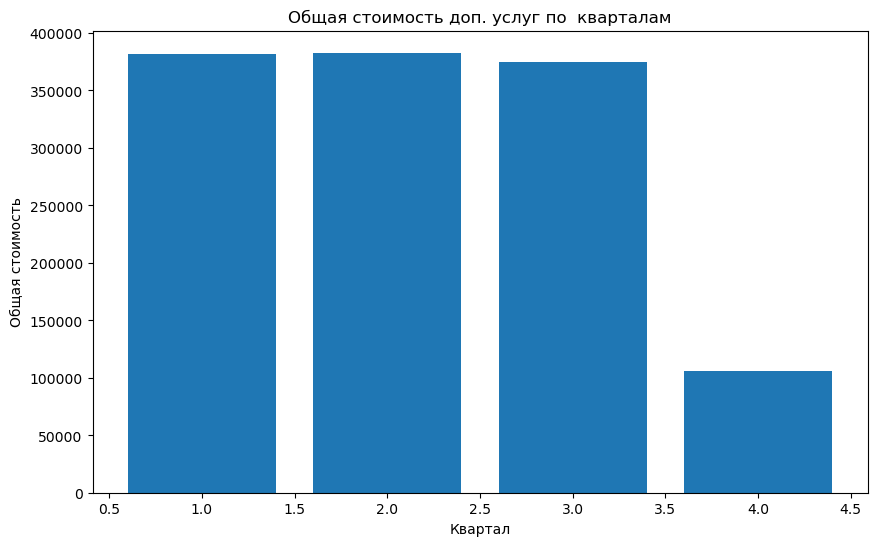

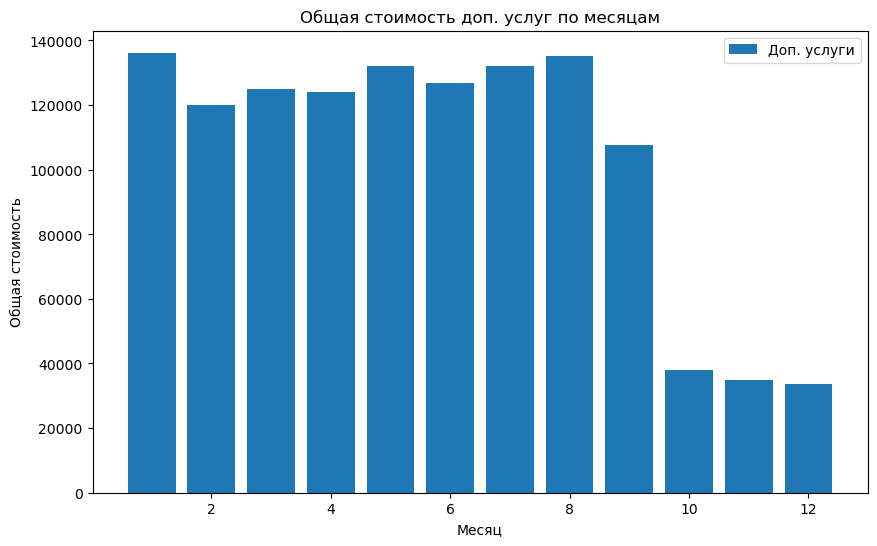

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(income['By_quarter']['Quarter'], income['By_quarter']['Add-on Total'], label='Доп. услуги')
plt.xlabel('Квартал')
plt.ylabel('Общая стоимость')
plt.title('Общая стоимость доп. услуг по  кварталам')
plt.figure(figsize=(10, 6))
plt.bar(income['By_month']['Month'], income['By_month']['Add-on Total'], label='Доп. услуги')
plt.xlabel('Месяц')
plt.ylabel('Общая стоимость')
plt.title('Общая стоимость доп. услуг по месяцам')

plt.legend()
plt.show()

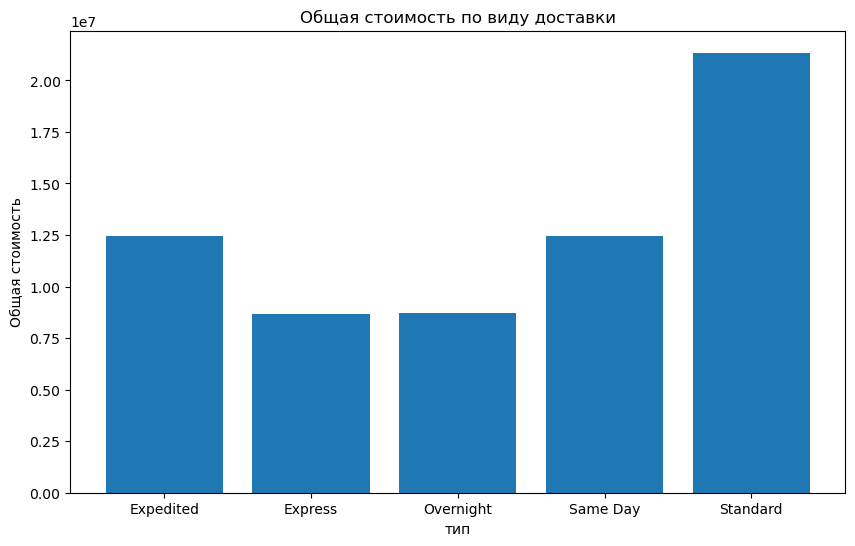

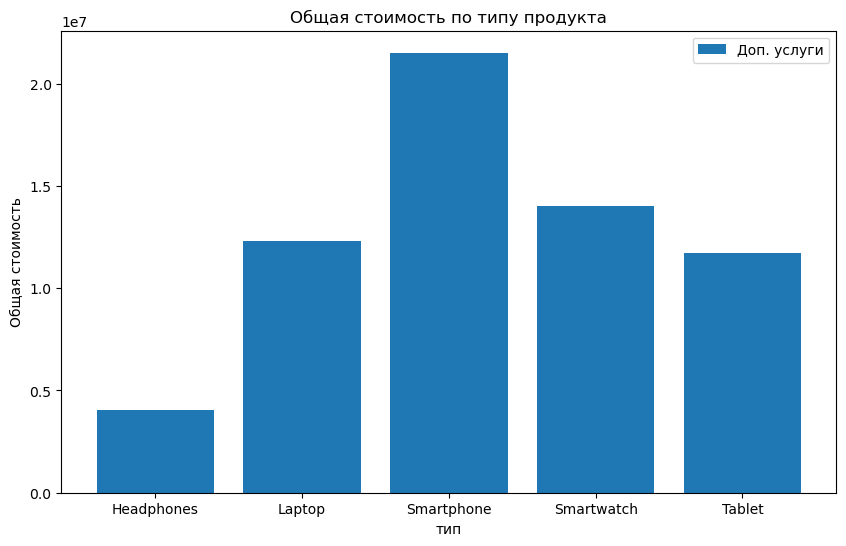

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(income['By_shipping']['Shipping Type'], income['By_shipping']['Total Price'], label='Доп. услуги')
plt.xlabel('тип')
plt.ylabel('Общая стоимость')
plt.title('Общая стоимость по виду доставки')
plt.figure(figsize=(10, 6))
plt.bar(income['By_product']['Product Type'], income['By_product']['Total Price'], label='Доп. услуги')
plt.xlabel('тип')
plt.ylabel('Общая стоимость')
plt.title('Общая стоимость по типу продукта')

plt.legend()
plt.show()